In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Contents

1. Basic functions
2. Converting Numpy array to Torch tensor
3. Cuda Tensors
4. Autograd
5. Loss & Back Propagation
6. Dataloader

## 1. Basic functions

In [2]:
# create empty tensor 5 x 3
x = torch.empty(5, 3)
print(x)

tensor([[ 6.0076e+01,  4.5835e-41, -9.4855e-11],
        [ 3.0686e-41,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  5.4735e-41,  0.0000e+00],
        [ 4.1591e-42,  0.0000e+00,  0.0000e+00]])


In [3]:
# create random tensor 5 x 3
x = torch.rand(5, 3)
print(x)

tensor([[0.1320, 0.4300, 0.7730],
        [0.9846, 0.5888, 0.6065],
        [0.4110, 0.8260, 0.9693],
        [0.1866, 0.6622, 0.6698],
        [0.7643, 0.1834, 0.0057]])


In [4]:
y = torch.rand(5, 3)
print(y)

tensor([[0.8161, 0.0016, 0.2997],
        [0.0852, 0.3073, 0.4699],
        [0.3752, 0.9965, 0.9496],
        [0.5776, 0.7458, 0.8067],
        [0.3411, 0.9674, 0.2781]])


In [5]:
# tensor operation on cpu
print(x + y)

tensor([[0.9481, 0.4316, 1.0727],
        [1.0699, 0.8961, 1.0763],
        [0.7862, 1.8226, 1.9189],
        [0.7642, 1.4079, 1.4765],
        [1.1054, 1.1508, 0.2839]])


## 2. Converting Numpy array to Torch tensor

In [6]:
a = np.ones(5)
print(a)

[1. 1. 1. 1. 1.]


In [7]:
# numpy to tensor
b = torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [8]:
np.add(a, 1, out=a)
print(a)

[2. 2. 2. 2. 2.]


In [9]:
print(b)

tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## 3. Cuda Tensors

In [13]:
x = torch.rand(2, 1)

if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device = device) # directly tensor on GPU
    x = x.to(device)                        # move tensor to GPU
# GPU operation
    z = x + y
    print(z)
# GPU to CPU
    print(z.to("cpu", torch.double))

tensor([[1.5567],
        [1.9872]], device='cuda:0')
tensor([[1.5567],
        [1.9872]], dtype=torch.float64)


## 4. Autograd

In [14]:
# create tensor
x = torch.tensor(1., requires_grad = True)
print(x)

tensor(1., requires_grad=True)


In [15]:
w = torch.tensor(3., requires_grad = True)
print(w)

tensor(3., requires_grad=True)


In [16]:
# Build computational graph
# out = (w * x + 2) ^ 2

y = w * x

print(y)
print(y.grad_fn)
print(y.requires_grad)

tensor(3., grad_fn=<MulBackward0>)
True


In [17]:
z = y + 2

print(z)
print(z.grad_fn)

tensor(5., grad_fn=<AddBackward0>)


In [18]:
out = z * z

print(out)
print(z.grad_fn)

tensor(25., grad_fn=<MulBackward0>)


In [19]:
# Compute Gradients
out.backward()

In [20]:
# 2 * (w * x + 2) * w
print(x.grad)
# 2 * (w * x + 2) * x
print(w.grad)


tensor(30.)
tensor(10.)


## 5. Loss & Back Propagation

In [21]:
# Create random tensor 5 * 3, 5 * 2
x = torch.rand(5, 3)
y = torch.rand(5, 2)

# Computational Graph will be y = w * x + b
affine = nn.Linear(3, 2)

print("weight : ", affine.weight)
print("bias : ", affine.bias)

weight :  Parameter containing:
tensor([[-0.0551,  0.3768,  0.2027],
        [ 0.5458, -0.1743,  0.5409]], requires_grad=True)
bias :  Parameter containing:
tensor([0.0135, 0.5668], requires_grad=True)


In [22]:
# Make loss function
criterion = nn.MSELoss()

# Create optimizer
optimizer = optim.Adam(affine.parameters(), lr = 0.001, betas = (0.9, 0.999))

In [23]:
# forward
prediction = affine(x)

In [24]:
loss = criterion(prediction, y)
print("Loss : {loss}".format(loss = loss.item()))

Loss : 0.22867567837238312


In [25]:
# backward
loss.backward()

In [26]:
print("dW / dL : {dw}".format(dw = affine.weight.grad))
print("db / dL : {db}".format(db = affine.bias.grad))

dW / dL : tensor([[-0.1865, -0.0987, -0.1423],
        [ 0.2623,  0.1496,  0.3013]])
db / dL : tensor([-0.3157,  0.4594])


In [27]:
# Before update
print("weight : ", affine.weight)
print("bias : ", affine.bias)

# After update
optimizer.step()

print("weight : ", affine.weight)
print("bias : ", affine.bias)

weight :  Parameter containing:
tensor([[-0.0551,  0.3768,  0.2027],
        [ 0.5458, -0.1743,  0.5409]], requires_grad=True)
bias :  Parameter containing:
tensor([0.0135, 0.5668], requires_grad=True)
weight :  Parameter containing:
tensor([[-0.0541,  0.3778,  0.2037],
        [ 0.5448, -0.1753,  0.5399]], requires_grad=True)
bias :  Parameter containing:
tensor([0.0145, 0.5658], requires_grad=True)


## 6. Dataloader

The output of torchvision datasets are PILImage images of range [0, 1]. we transform them to Tensors of normalized range [-1, 1]

In [42]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root = '../data', train=True,
                                       download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root = '../data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 4,
                                        shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


deer plane ship frog


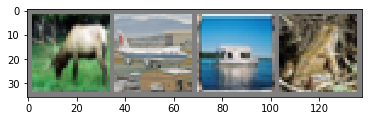

In [43]:
# function to show an image

def imshow(img):
    img = img / 2 + 0.5                        # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show
    
# Data iterator
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join("{classes}".format(classes = classes[labels[j]]) for j in range(4)))